# importing the libariries (or ) Dependieses


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [4]:
#Data collection and  processing

In [6]:
gold_data=pd.read_csv('gld_price_data.csv')

In [7]:
# print first 5 rows of the data frame
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [8]:
#print last five rows of the data frame
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [10]:
#number of rows and columns
gold_data.shape

(2290, 6)

In [11]:
#getting basic information  about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [12]:
#checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [13]:
# getting the statistical mesaure of the data
gold_data.describe()


,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


# correlation betweenn 
#positive correlation
#negative correlation

In [15]:
correlation=gold_data.corr()

<AxesSubplot:>

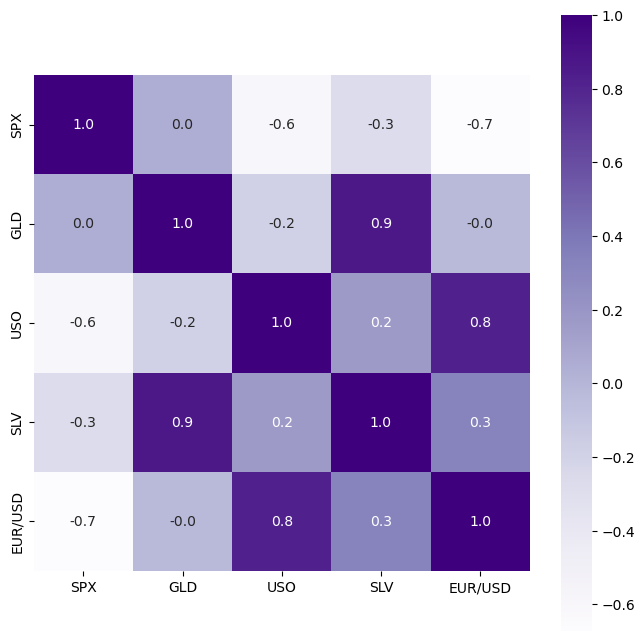

In [20]:
# constructing a heatmap to understand the correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':10},cmap='Purples')


In [21]:
#correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\rahul\AppData\Local\Temp\ipykernel_28292\1851748329.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='Green')


<AxesSubplot:xlabel='GLD', ylabel='Density'>

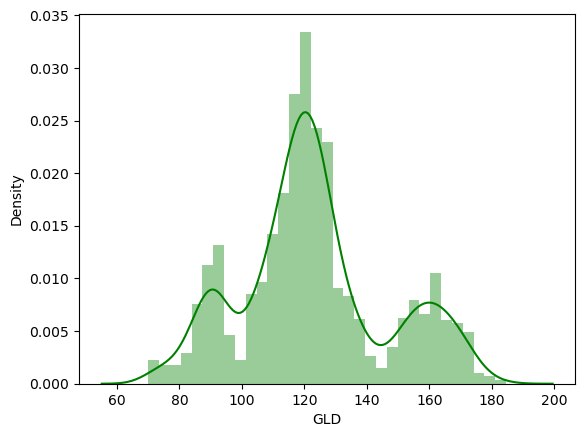

In [23]:
#checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='Green')

In [24]:
#Splitting the features and targets


In [25]:
x=gold_data.drop(['Date','GLD'],axis=1)
y=gold_data['GLD']

In [26]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [27]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [28]:
 #Splitting into training data and test data

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)


In [31]:
#MODEL TRAINING

In [32]:
#RANDOM FOREST REGRESSOR


In [33]:
regressor=RandomForestRegressor(n_estimators=100)

In [34]:
#traing the model
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [35]:
#model evaluation

In [36]:
#prediction on test data

In [37]:
test_data_predict=regressor.predict(x_test)

In [38]:
print(test_data_predict)

[168.79919968  81.82579982 115.8142003  127.63580083 120.51370116
 154.65829788 150.14509881 126.02340056 117.61499851 125.96750105
 116.67390087 171.52140103 141.25319831 167.81469835 114.99410005
 117.55280052 137.6382039  170.18860158 159.87020401 160.75099952
 155.14680028 125.12950008 176.16859965 157.17000382 125.26130066
  93.79039957  77.50450011 120.54690033 119.0218991  167.44039929
  88.17830054 125.36450049  91.25220069 117.84209974 121.05169941
 136.16200017 115.33390134 114.74160077 148.83800007 107.24900093
 104.16230234  87.13689774 126.58060052 117.69819997 151.42289904
 119.81979975 108.39989966 108.05159831  93.2276005  127.19059768
  74.75540049 113.66999913 121.51540026 111.359599   118.83119886
 120.25829956 160.12400035 168.22310118 146.83929623  85.72089846
  94.17540019  86.83349853  90.65970031 118.98680065 126.44640082
 127.49950003 169.54909968 122.24129932 117.26129906  98.63950055
 167.49900028 143.01599802 131.79930267 121.19500215 121.24649943
 119.60940

In [39]:
#R squared error
error_score=metrics.r2_score(test_data_predict,y_test)

In [41]:
print("R squared error : ",error_score)

R squared error :  0.9887492668762665


In [42]:
#compare the actual values and predicted  vales in a plot

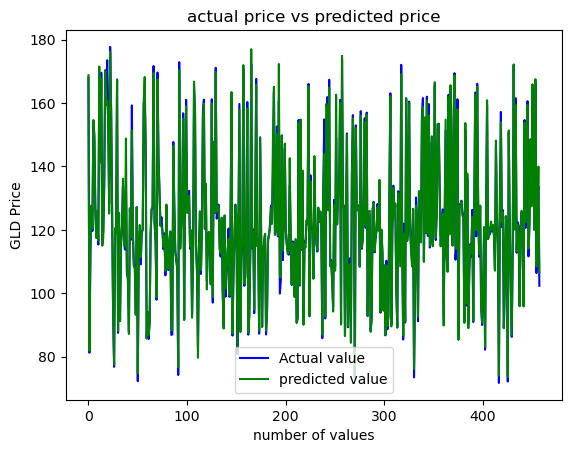

In [43]:
y_test = list(y_test)
plt.plot(y_test,color="blue",label="Actual value")
plt.plot(test_data_predict,color="green",label="predicted value")
plt.title("actual price vs predicted price")
plt.ylabel('GLD Price')
plt.xlabel('number of values')
plt.legend()
plt.show()